In [ ]:
# Ce projet fonctionne avec les versions des package suivants:
# pandas 2.2.2
# matplotlib 3.9.0

In [ ]:
# Nous allons réaliser une analyse afin d'obtimiser les tourner des personne de l'entretien
# Le contexte
# Un markdown pour ce que j'ai obtenu

In [1287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1289]:
data= pd.read_csv("datas/p2-arbres-fr.csv", sep=";") #chargement du fichier CSV dans la variables data
print(data.head(10)) #Affiche les 10 première ligne du fichier pour vérifier que ce dernier est bien chargé

      id type_emplacement domanialite   arrondissement complement_addresse  \
0  99874            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
1  99875            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
2  99876            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
3  99877            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
4  99878            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
5  99879            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
6  99880            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
7  99881            Arbre      Jardin  PARIS 16E ARRDT                 NaN   
8  99882            Arbre      Jardin  PARIS 16E ARRDT                 NaN   
9  99883            Arbre      Jardin  PARIS 16E ARRDT                 NaN   

   numero                                               lieu id_emplacement  \
0     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E  

In [1291]:
dimension = data.shape
print(f"Le nombre de ligne du dataFrame {dimension[0]}")
print(f"Le nombre de colonne du dataFrame {dimension[1]}")

Le nombre de ligne du dataFrame 200137
Le nombre de colonne du dataFrame 18


In [1293]:
# on identifie les colonnes ayant des données nul pour nettoyer notre jeu de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [1295]:
# on transforme ces résultat en pourcentage pour une meilleur lecture
non_null_percentage = (data.isnull().sum()/len(data))*100
print(f"\nNombre de données null en % :\n{non_null_percentage.round(2)}")


Nombre de données null en % :
id                       0.00
type_emplacement         0.00
domanialite              0.00
arrondissement           0.00
complement_addresse     84.56
numero                 100.00
lieu                     0.00
id_emplacement           0.00
libelle_francais         0.75
genre                    0.01
espece                   0.88
variete                 81.62
circonference_cm         0.00
hauteur_m                0.00
stade_developpement     33.58
remarquable             31.53
geo_point_2d_a           0.00
geo_point_2d_b           0.00
dtype: float64


In [1297]:
# La colonne "numero" ayant que des valeur null, nous pouvons nous en passer
data = data.drop(columns =['numero'])
data.describe()

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [1299]:
# on remarque un arbre de 881 kms et un autre arbre de circonference 2500m sont des valeurs abérantes
# nous avons aussi des arbres ayant une hauteur de 0 et une circonférence de 0
# nous allons donc travailler notre dataset pour le rendre plus cohérent.

# commencons par la hauteur et affichons les 10 valeurs les plus grandes pour determiner lesquels des valeur sont "Impossible", "abérantes" ou "athypique"


In [1305]:
# En 2021 un des arbres le plus haut à Paris faisait 30m
# https://agriculture.gouv.fr/lun-des-plus-grands-arbres-de-paris-veille-sur-le-78-rue-de-varenne
# on peut retrouver une data d'un arbre de 45m en 2006
# https://public.opendatasoft.com/explore/dataset/arbresremarquablesparis2011/table/?flg=fr-fr&sort=arbres_hauteurenm

max_height=50

num_tall_trees = (data['hauteur_m']>max_height).sum()
print(f"Il y a {sorted_hauteur} arbres ayant une hauteur de {max_height} m soit {((sorted_hauteur/dimension[0])*100).round(2)} % du total des arbres")

Il y a 445 arbres ayant une hauteur de 50 m soit 0.22 % du total des arbres


In [1307]:
# on retire donc dans un premier temps la hauteur impossible en considérant un hauteur max de 50 m
data = data[data['hauteur_m'] <= max_height]
data.describe()

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,1.996920e+05,199692.000000,199692.000000,136599.000000,199692.000000,199692.000000
mean,3.853691e+05,83.393766,8.333484,0.001340,48.854528,2.348208
std,5.432361e+05,673.615295,6.206695,0.036577,0.030233,0.051250
min,9.987400e+04,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.557658e+05,30.000000,5.000000,0.000000,48.835063,2.307484
50%,2.209215e+05,70.000000,8.000000,0.000000,48.854208,2.351170
75%,2.738762e+05,115.000000,12.000000,0.000000,48.876488,2.386878
max,2.024745e+06,250255.000000,50.000000,1.000000,48.911485,2.469759


In [1309]:
# Pour finir le travail sur la hauteur, on veut savoir combien d'arbre ont une hauteur de zero

hauteur_zero_counts = (data['hauteur_m'] == 0).sum()
print(f" il y a {hauteur_zero_counts} arbres de hauteur 0")

 il y a 39219 arbres de hauteur 0


In [1311]:
#On va remplacer la valeur des arbres ayant une hauteur null par la  moyenne de la hauteur des arbres ayant une hauteur non null

# on selectionne les arbres ayant une hauteur non null
non_hauteur_null_list = data[data['hauteur_m'] != 0]

# on calcul la hauteur moyenne
mean_hauteur = non_hauteur_null_list['hauteur_m'].mean()
print(f"Hauteur moyenne calculée : {mean_hauteur.round(3)} m")

# On remplace la valeur de la hauteur par la moyenne caclulée
data['hauteur_m']= data['hauteur_m'].replace(0, mean_hauteur)
data.describe()

Hauteur moyenne calculée : 10.37 m


,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,1.996920e+05,199692.000000,199692.000000,136599.000000,199692.000000,199692.000000
mean,3.853691e+05,83.393766,10.370156,0.001340,48.854528,2.348208
std,5.432361e+05,673.615295,4.642241,0.036577,0.030233,0.051250
min,9.987400e+04,0.000000,1.000000,0.000000,48.742290,2.210241
25%,1.557658e+05,30.000000,7.000000,0.000000,48.835063,2.307484
50%,2.209215e+05,70.000000,10.000000,0.000000,48.854208,2.351170
75%,2.738762e+05,115.000000,12.000000,0.000000,48.876488,2.386878
max,2.024745e+06,250255.000000,50.000000,1.000000,48.911485,2.469759


In [1367]:
# En 2006 la circonférence max des arbres à Paris était de 740 cm
# https://public.opendatasoft.com/explore/dataset/arbresremarquablesparis2011/table/?flg=fr-fr&sort=arbres_hauteurenm
# https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris
# Les arbres au dessus seront donc considéré comme des valeurs abérantes.

max_circonference = 740
sorted_circonference = (data['circonference_cm']>max_circonference).sum()
numb_circonference_null = (data['circonference_cm']==0).sum()

print(f"Il y a {sorted_circonference} arbres ayant une circonference de plus de {max_circonference/100} m soit {((sorted_circonference/dimension[0])*100).round(2)} % du total des arbres")
print(f"et {numb_circonference_null} arbres ayant une circonference null soit {((numb_circonference_null/dimension[0])*100).round(2)} % du total des arbres")

Il y a 0 arbres ayant une circonference de plus de 7.4 m soit 0.0 % du total des arbres
et 0 arbres ayant une circonference null soit 0.0 % du total des arbres


In [1343]:
# On peut raisonnablement supprimer du dataset les arbres ayant une circonférence supérieurs à max_circonference
data = data[data['circonference_cm'] <= max_circonference]

# on selectionne les arbres ayant une hauteur non null
non_circonference_null_list = data[data['circonference_cm'] != 0]

# on calcul la circonference moyenne
mean_circonference = non_circonference_null_list['circonference_cm'].mean()
print(f"Circonference moyenne calculée : {mean_circonference.round(3)} cm")

# On remplace la valeur de la circonference par la moyenne caclulée
data['circonference_cm']= data['circonference_cm'].replace(0, mean_hauteur)

Circonference moyenne calculée : 81.038 cm


In [1345]:
# Calcul des caractéristiques principales pour les variables quantitatives
quantitative_columns = ['circonference_cm', 'hauteur_m', 'geo_point_2d_a', 'geo_point_2d_b']

# Describe pour obtenir les statistiques de base
stats_summary = data[quantitative_columns].describe().transpose()

# Affiche le résumé des statistiques
print(stats_summary)

                     count       mean        std        min        25%  \
circonference_cm  199613.0  81.038469  61.294525   1.000000  30.000000   
hauteur_m         199613.0  10.368737   4.641351   1.000000   7.000000   
geo_point_2d_a    199613.0  48.854528   0.030235  48.742290  48.835062   
geo_point_2d_b    199613.0   2.348211   0.051253   2.210241   2.307485   

                        50%         75%         max  
circonference_cm  70.000000  115.000000  710.000000  
hauteur_m         10.000000   12.000000   50.000000  
geo_point_2d_a    48.854207   48.876491   48.911485  
geo_point_2d_b     2.351176    2.386882    2.469759  


In [1389]:
unique_stade_developpement = data['stade_developpement'].unique()
print(f'List des valeurs possible dans la colonne stade de développement {unique_stade_developpement}')

total_nan = data['stade_developpement'].isnull().sum()
print(f'total nan {total_nan}')

stade_developpement_counts = data['stade_developpement'].value_counts()
print(f'Nombre d\individus pour chaque cas dans {stade_developpement_counts}')


List des valeurs possible dans la colonne stade de développement [nan 'A' 'J' 'M' 'JA']
total nan 67197
Nombre d\individus pour chaque cas dans stade_developpement
A     64278
JA    35160
J     26878
M      6100
Name: count, dtype: int64


In [1347]:
# Autre façon d'obtenir les statistiques avec les methodes
stats_dict={}

for column in quantitative_columns:
    stats_dict[column]={
        'Nb de valeur (count)':data[column].count(),
        'Moyenne (mean)':data[column].mean(),
        'std (ecart type)':data[column].std(),
        'mini':data[column].min(),
        '25%':data[column].quantile(0.25),
        '50% mediane':data[column].median(),
        '75%':data[column].quantile(0.75),
        'maxi':data[column].max()
    }

#conversion du dictionnaire en Dataframe pour un meilleur affichage
stats_df=pd.DataFrame(stats_dict).transpose()
print(stats_df)

                  Nb de valeur (count)  Moyenne (mean)  std (ecart type)  \
circonference_cm              199613.0       81.038469         61.294525   
hauteur_m                     199613.0       10.368737          4.641351   
geo_point_2d_a                199613.0       48.854528          0.030235   
geo_point_2d_b                199613.0        2.348211          0.051253   

                       mini        25%  50% mediane         75%        maxi  
circonference_cm   1.000000  30.000000    70.000000  115.000000  710.000000  
hauteur_m          1.000000   7.000000    10.000000   12.000000   50.000000  
geo_point_2d_a    48.742290  48.835062    48.854207   48.876491   48.911485  
geo_point_2d_b     2.210241   2.307485     2.351176    2.386882    2.469759  


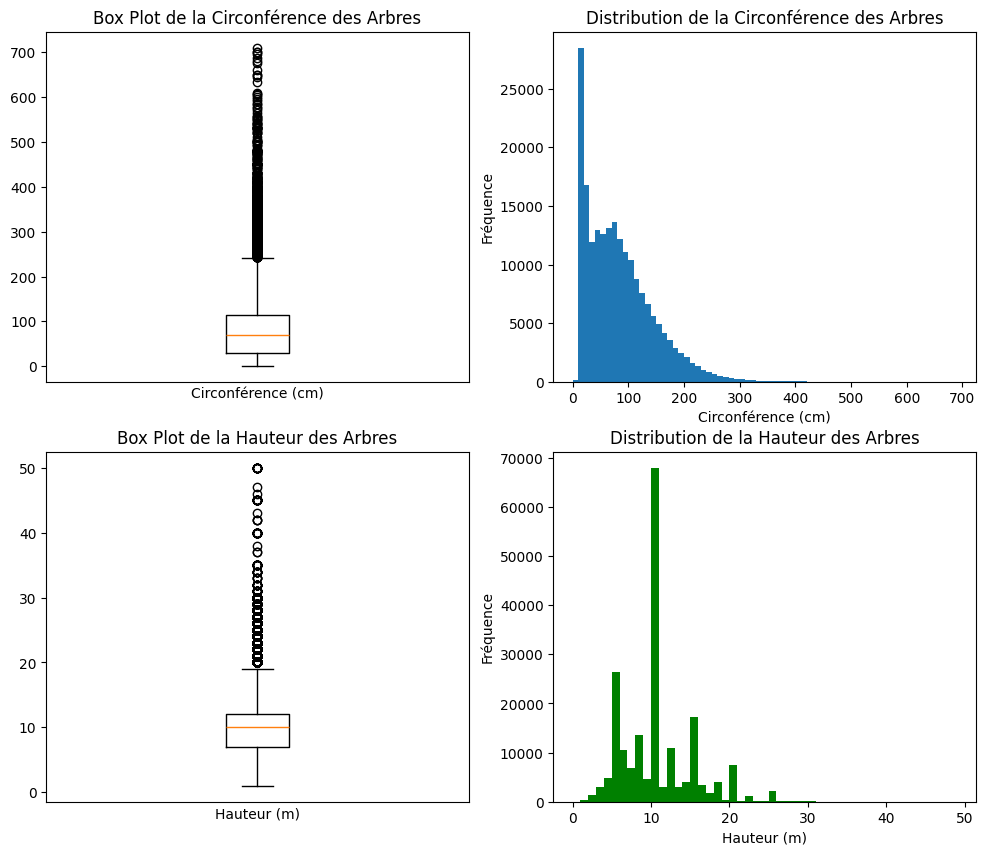

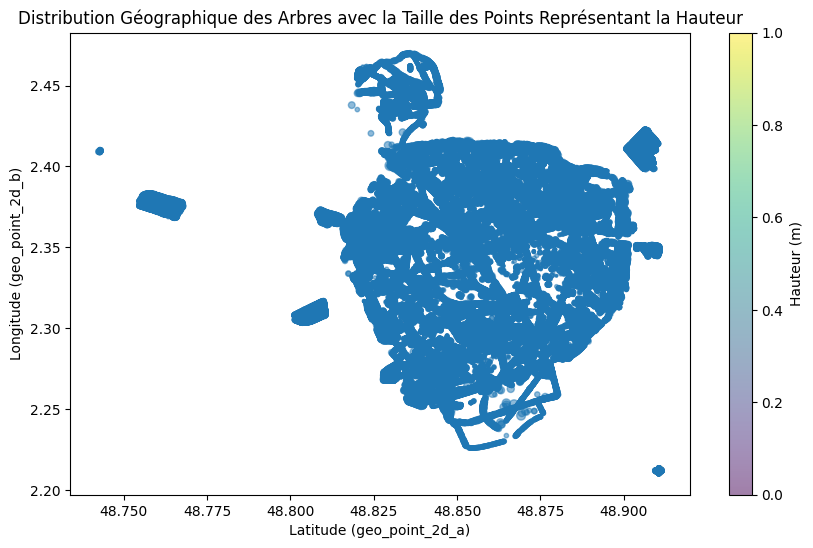

In [1349]:
def create_graphics(data):
    plt.figure(figsize=(12,10))

    # Box plot pour circonference_cm
    plt.subplot(2,2,1)
    plt.boxplot(data['circonference_cm'])
    plt.title('Box Plot de la Circonférence des Arbres')
    plt.xlabel('Circonférence (cm)')
    plt.xticks([])
    
    # Histogramme avec courbe de densité pour circonference_cm
    plt.subplot(2,2,2)
    plt.hist(data['circonference_cm'], bins=range(0,700,10))
    plt.title('Distribution de la Circonférence des Arbres')
    plt.xlabel('Circonférence (cm)')
    plt.ylabel('Fréquence')

    # Box plot pour la hauteur_m
    plt.subplot(2,2,3)
    plt.boxplot(data['hauteur_m'])
    plt.title('Box Plot de la Hauteur des Arbres')
    plt.xlabel('Hauteur (m)')
    plt.xticks([])

    # Histogramme avec courbe de densité pour hauteur_m
    plt.subplot(2,2,4)
    plt.hist(data['hauteur_m'], bins =range(0,50,1), color='green')
    plt.title('Distribution de la Hauteur des Arbres')
    plt.xlabel('Hauteur (m)')
    plt.ylabel('Fréquence')

    plt.figure(figsize=(10,6))
    plt.scatter(data['geo_point_2d_a'],data['geo_point_2d_b'], s=data['hauteur_m'], alpha=0.5)
    plt.title('Distribution Géographique des Arbres avec la Taille des Points Représentant la Hauteur')
    plt.xlabel('Latitude (geo_point_2d_a)')
    plt.ylabel('Longitude (geo_point_2d_b)')
    plt.colorbar(label='Hauteur (m)')

create_graphics(data)

In [1351]:
def plot_qualitative(data,column, title,ylabel):
    plt.figure(figsize=(10,6))
    data[column].value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel(ylabel)

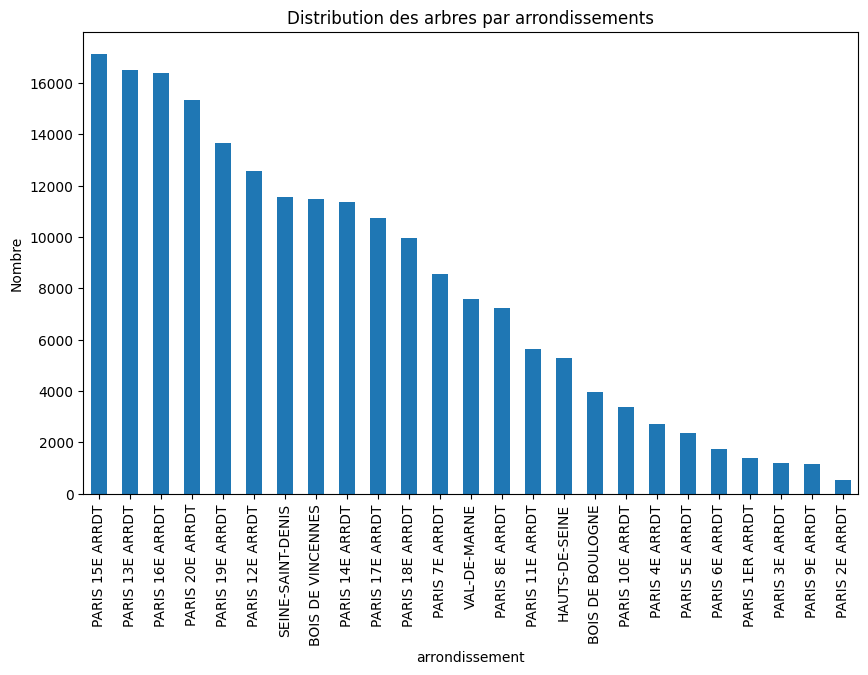

In [1353]:
plot_qualitative(data,'arrondissement','Distribution des arbres par arrondissements','Nombre')

In [1355]:
grouped_data = data.groupby(['arrondissement', 'genre']).size().reset_index(name='count')

Text(0, 0.5, "Nombre d'arbres")

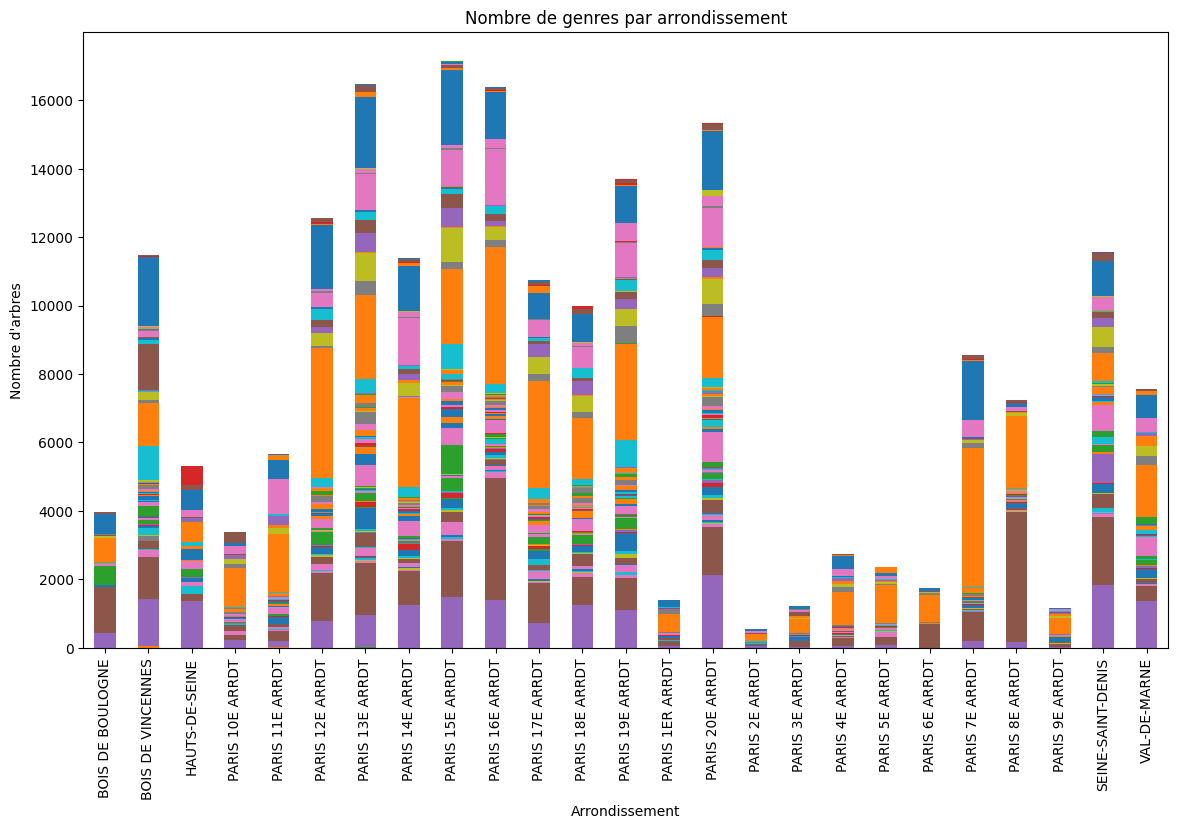

In [1357]:
pivot_data = grouped_data.pivot(index='arrondissement', columns='genre', values='count').fillna(0)

# Créer un graphique en barres empilé
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), legend=False)

plt.title('Nombre de genres par arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Nombre d\'arbres')


In [1359]:
top_10_cirocnference = data.nlargest(10,'hauteur_m')
top_10_cirocnference

,id,type_emplacement,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
44019,149615,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,CIMETIERE DE PANTIN / AVENUE PRINCIPALE / DIV 21,A14000021014,Marronnier,Aesculus,hippocastanum,NaN,210.0,50.0,M,0.0,48.906505,2.403788
44050,149646,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,CIMETIERE DE PANTIN / AVENUE PRINCIPALE / DIV 15,A14000015009,Marronnier,Aesculus,hippocastanum,NaN,260.0,50.0,M,0.0,48.907111,2.402622
44116,149712,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,CIMETIERE DE PANTIN / AVENUE PRINCIPALE / DIV 3,A14000003018,Marronnier,Aesculus,hippocastanum,NaN,205.0,50.0,M,0.0,48.907884,2.400887
56477,162487,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,CIMETIERE DE PANTIN / AVENUE DES PLATANES D'OR...,A08200004007,Platane,Platanus,orientalis,NaN,185.0,50.0,A,0.0,48.907215,2.400593
115631,238248,Arbre,Alignement,PARIS 12E ARRDT,18,AVENUE DE LA PORTE DE CHARENTON,202034,Platane,Platanus,x hispanica,NaN,25.0,50.0,J,0.0,48.829860,2.400542
115729,238383,Arbre,Alignement,PARIS 18E ARRDT,2,SQUARE DE CLIGNANCOURT,202001,Charme-Houblon,Ostrya,carpinifolia,NaN,25.0,50.0,J,0.0,48.892279,2.346235
175582,300664,Arbre,Alignement,PARIS 13E ARRDT,NaN,AVENUE LEON BOLLEE,101007,Tilleul,Tilia,x europaea,NaN,185.0,50.0,JA,0.0,48.818650,2.364364
179222,347356,Arbre,Alignement,PARIS 12E ARRDT,118,COURS DE VINCENNES,404007,Cerisier à grappes,Prunus,padus,NaN,30.0,50.0,J,0.0,48.846807,2.410534
179560,347707,Arbre,Alignement,PARIS 12E ARRDT,4,AVENUE DU BEL AIR,202005,Erable,Acer,pseudoplatanus,NaN,75.0,50.0,A,0.0,48.845617,2.398178
179796,347946,Arbre,Alignement,PARIS 12E ARRDT,1,PLACE EDOUARD RENARD,101008,Palmier,Trachycarpus,fortunei,NaN,45.0,50.0,A,0.0,48.835271,2.407628


In [1361]:
print(data.columns)

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'lieu', 'id_emplacement', 'libelle_francais',
       'genre', 'espece', 'variete', 'circonference_cm', 'hauteur_m',
       'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')


In [1363]:
# Nettoyage des données

# Detecter les outliers

# Fonction pour détecter les outliers en dehors des moustaches pour 'circonference_cm et hauteur_m
def detect_outliers_(data, column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 +1.5 * IQR
    outliers = (data['column']<lower_limit | data['column']>upper_limit)
    return outliers

# Detect les oultiers pour la circonference et la hauteur
outliers_circonference = detect_outliers(data, 'circonference_cm')
outliers_hauteur = detect_outliers(data, 'hauteur_m')
outliers_circonference = outliers_circonference.astype(bool)
outliers_hauteur = outliers_hauteur.astype(bool)

# choix des colonnes à afficher
columnsToDisplay = ['circonference_cm','hauteur_m','libelle_francais','geo_point_2d_a','geo_point_2d_b']

# list des outliers du dataset
outliers_combined = outliers_circonference | outliers_hauteur
print('DataFrame sans les outliers')

# masque pour récupérer les valeur du dataset hors outlier
clean_data = data[~outliers_combined]
print(clean_data[columnsToDisplay])


DataFrame sans les outliers
        circonference_cm  hauteur_m     libelle_francais  geo_point_2d_a  \
0              20.000000   5.000000           Marronnier       48.857620   
1              65.000000   8.000000                   If       48.857656   
2              90.000000  10.000000                   If       48.857705   
3              60.000000   8.000000               Erable       48.857722   
4              38.000000  10.370156         Arbre à miel       48.890435   
...                  ...        ...                  ...             ...   
200132         10.370156  10.370156                  NaN       48.821957   
200133         10.370156  10.370156  Arbre aux mouchoirs       48.823254   
200134         10.370156  10.370156             Peuplier       48.822907   
200135         10.370156  10.370156                Chêne       48.822522   
200136         10.370156  10.370156            Raisinier       48.820445   

        geo_point_2d_b  
0             2.320962  
1        

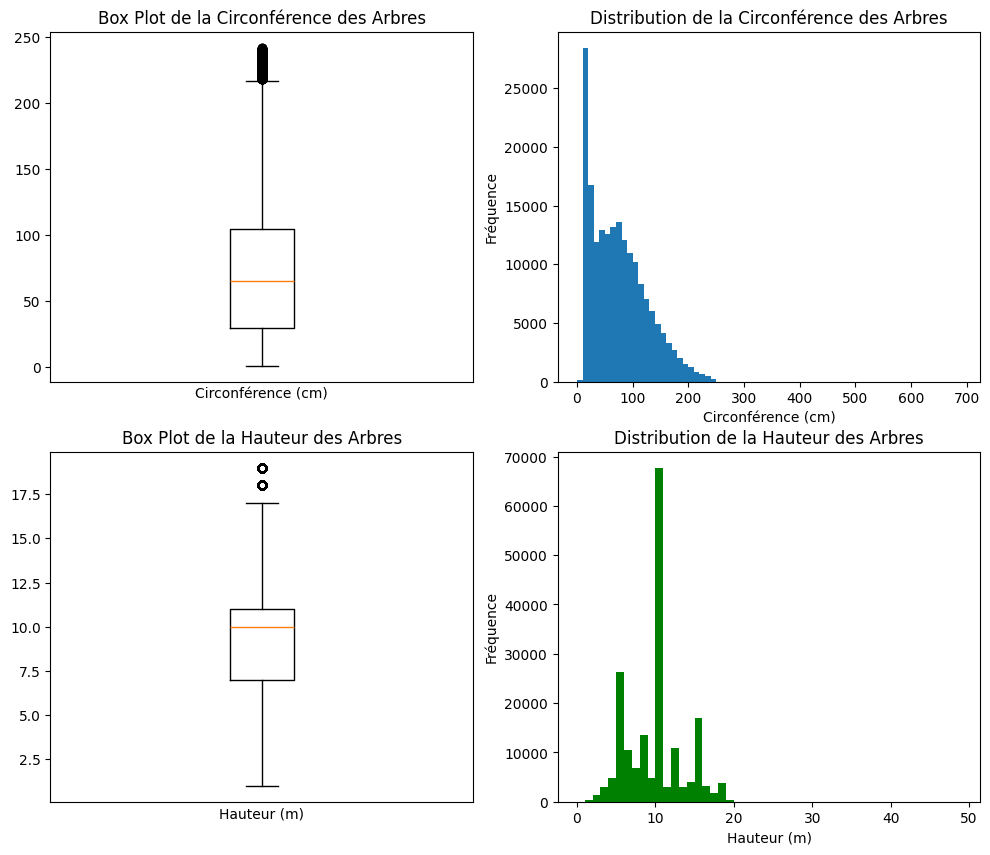

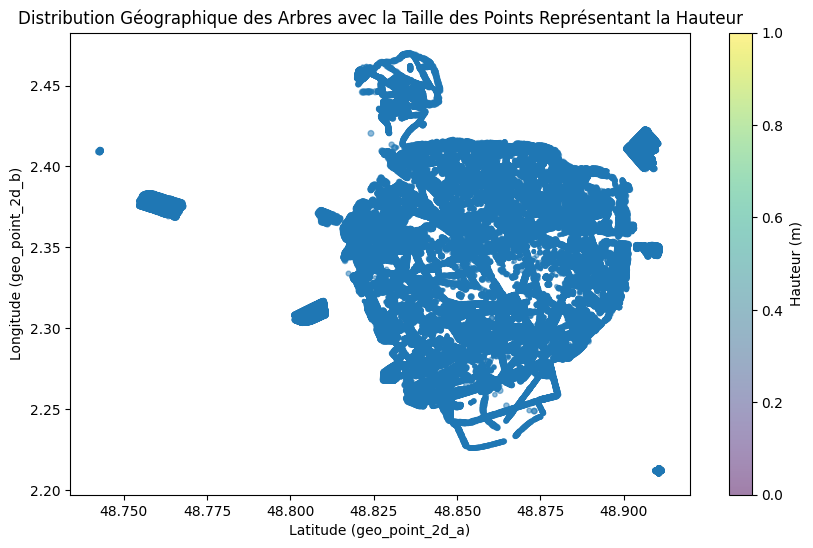

In [1365]:
# On affiche de nouveau les graphiques avec le dataFrame nettoyé

create_graphics(clean_data)